In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
import matplotlib.pyplot as plt
from utils import *
from compare import compare



In [17]:
val_labels = loadLabels("data/val_labels/", 1000)
print("labels of {} images loaded".format(str(len(val_labels))))
print('first data:')
print(val_labels[0])

labels of 1000 images loaded
first data:
[(153, 125), (79, 151), (100, 153), (273, 177), (262, 202), (204, 206), (313, 228), (273, 230), (66, 255), (178, 285), (143, 298), (39, 304), (305, 312), (32, 334), (61, 347), (80, 349), (605, 44), (441, 94), (448, 109), (445, 117), (429, 165), (426, 173), (538, 177), (519, 209), (674, 212), (426, 223), (668, 227), (599, 266), (596, 275), (453, 293), (801, 98), (791, 137), (1058, 153), (1047, 201), (1049, 228), (817, 234), (1157, 269), (907, 282), (810, 285), (1125, 318), (898, 329), (1051, 333), (802, 341), (1086, 365), (1214, 103), (1328, 144), (1184, 147), (1195, 161), (1373, 194), (1214, 204), (1413, 240), (1487, 283), (1193, 292), (1180, 301), (1238, 366)]


In [18]:
resultPath = "data/val_results/"
archs = ["yolov3-peaks", "newpeaksv2", "newpeaksv3","newpeaksv4", "newpeaksv5"]

threshs = [0.005, 0.01, 0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5]
pre_vs_sen = {}

for arch in archs:
    print("******************************************")
    print("*****       validating " + arch)
    print("******************************************")
    val_results = loadResults(resultPath+arch+".json")
    print("results of {} images loaded".format(str(len(val_results))))
    print('first data has {} objects'.format(str(len(val_results[0]))))
    
    for thresh in threshs:
        print("========== threshold " + str(thresh) + " ==========")
        val_comp_results, val_comp_stats = compare( val_labels, val_results, thresh, (11,11), False )
        val_sen, val_pre, val_iou, val_dist = val_comp_stats
        print('val sensitivity:', val_sen)
        print('val precision:', val_pre)
        print('val avg. IOU:', val_iou)
        print('val avg. dist.:', val_dist)
        pre_vs_sen[ (arch, thresh) ] = val_comp_stats
        if val_sen == -1:
            break

******************************************
*****       validating yolov3-peaks
******************************************
data/val_results/yolov3-peaks.json
results of 1000 images loaded
first data has 186 objects
========== threshold 0.005 ==========
val sensitivity: 0.9905261004359253
val precision: 0.2051418272129641
val avg. IOU: 0.22617888171147887
val avg. dist.: 4.242488985660131
========== threshold 0.01 ==========
val sensitivity: 0.9869379790063422
val precision: 0.29768075491759705
val avg. IOU: 0.223541035580277
val avg. dist.: 4.3209011732348195
========== threshold 0.02 ==========
val sensitivity: 0.9811466251199975
val precision: 0.3935176418607587
val avg. IOU: 0.22208158163119154
val avg. dist.: 4.369995336951237
========== threshold 0.05 ==========
val sensitivity: 0.9661646444140188
val precision: 0.5080603783578014
val avg. IOU: 0.22097519557721865
val avg. dist.: 4.4141516623929125
========== threshold 0.1 ==========
val sensitivity: 0.9404812489180555
val precisio

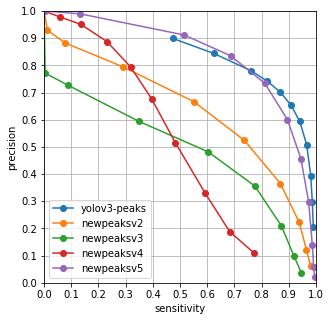

In [25]:
fig, ax = plt.subplots(1)
for arch in archs:
    x = []
    y = []
    for thresh in threshs:
        sen, pre, _, _ = pre_vs_sen[ (arch, thresh) ]
        if sen != -1:
            x.append( min([sen, 1]) )
            y.append( min([pre, 1]) )
        else:
            break
    plt.plot( x, y, '-o', label=arch )
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('precision')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(True)
ax.set_aspect('equal')
fig.set_size_inches(5, 5)
plt.show()